# Quantum Computing: Exploring Deutsch's Algorithm

*Jakub Prochnicki G00373793*

---

# Table of Contents
1. [Introduction To Quantum Computing](#example)
2. [Key Quantum Concepts](#example2)
3. [Deutsch's Algorithm: The Oracle Problem](#example2)
4. [Implementing Deutsch's Algorithm in Qiskit](#example2)


---



## **What is Quantum Computing and How does it compare to Classical Computers?**

"Quantum computing is a rapidly-emerging technology that harnesses the laws of quantum mechanics to solve problems too complex for classical computers."[1] 

### *Classical Computers*

Classical Computers like a laptop process information using bits. A bit can be taught of as a switch with two states: 0 and 1, which in simple terms means off or on. These bits are used to represent all the calculations in a classical computer.

### *Quantum Computers*

In Quantum Computers, calculations are done using quantum bits(qubits). These qubits can be in any hybrid position of 0 and 1, meaning they can either be 0 or 1, or a combination of both. This is known as superposition. Superposition is a quantum concept that allows qubits to exist in multiple states simultaneously. This concept allows quantum computers to perform certain computations more efficiently.[2]



## **Key Quantum Concepts**


### *Qubits*



### *Quantum Superposition and Entanglement*



### *Hammard Gates*

### *Oracle*

In the context of the problem I am going to be exploring in this notebook, an oracle is essentially an operation that has some property that you don't know, and are trying to find out. The term "black box" is used to simplify that it's just a box that you can't see inside of, and therefore don't know what it's doing. All we know is that it can receive input and produce output. I will be demonstrating an oracle in action during the steps of implementing Deutsch's Algorithm in Qiskit.

# **Deutsch's Algorithm**

Deutsch's Algorithm was proposed by David Deutsch in 1985 in order to demonstrate the computational speedup of quantum computers compared to classical computer for certain tasks. It indicates that quantum computers could be more powerful than classical computers. It is one of the earliest algorithms to explore this idea. 

### *The Oracle Problem*

You are given a function of $f(x)$.The function is hidden and what it does is not disclosed. This function takes in a list of bits (0 or a 1) and returns either a 0 or a 1, based on the input. The aim of the problem is to determine whether the  function is either a constant or a balanced function. 

$f : \{0,1\} \rightarrow \{0,1\}$

*A constant function* is a function that always returns the same value no matter what input it is given. We can see this in the table below. The constant function always returns 0, whether the input is 0 or 1.

$\begin{array}{|c|c|}
\hline
\text{Input (x)} & \text{Output (f1(x))} \\
\hline
0 & 0 \\
\hline
1 & 0 \\
\hline
\end{array}$

*A balanced function* is a function that returns 0 for half of the inputs and 1 for the other half. We can see in the table below that this function returns 0 when the input is 0 and returns 1 when the input is 1.

$\begin{array}{|c|c|}
\hline
\text{Input (x)} & \text{Output (f2(x))} \\
\hline
0 & 0 \\
\hline
1 & 1 \\
\hline
\end{array}$




### *Classical Computer Solution*


In [4]:
def constant(x):
    return 0  # will always return 0

def balanced(x):
    return x  # will return 0 if input is 0, will return 1 if input is 1

def determine_function(f):
    if f(0) == f(1):
        return "Constant"
    else:
        return "Balanced"

# test functions
print(determine_function_type(constant_function))  
print(determine_function_type(balanced_function))  

Constant
Balanced


# **Implementing Deutsch's Algorithm in Qiskit**

## *Step 1: Initialization*

The first step of implementing the Deutsch's Algorithm in Qiskit is initialization. During this stage, I am initializing two qubits. The first qubit is initialized in the state ∣0⟩, and the second qubit is initialized in the state ∣1⟩.

## *Step 2: Superposition*

In this step, I am applying a Hammard Gate to both qubits, which puts them in a state of superposition. This means that they are in a combination of all possible states.

## *Step 3: Oracle Application*
 
In this step, I am applying the oracle function, $( U_f )$, to both qubits. The oracle is a black-box quantum operation that knows how to compute the function $f(x)$. If $f(x)$ is constant, it leaves the first qubit unchanged; if $f(x)$ is balanced, it flips the first qubit.


## *Step 4: Interference*

In this step, I am applying a hammard gate to the first qubit. This causes interference and causes the quantum states to combine in ways that extract the property of the function.

# Step 5: Measurement

Here I am measuring the first qubit. We can determine the type of function by looking at the state of the qubit.

- If the first qubit is observed in the state $|0\rangle$ , then the function $(f)$ is constant.

-  If it is in the state $|1\rangle$ , then the function $(f)$ is balanced.

In [27]:
from qiskit import QuantumCircuit
from qiskit.visualization import  plot_histogram

def deutsch_algorithm(function_type):
    
    # creating a quantum circuit consisting of two qubits and a classical register of 1
    circuit = QuantumCircuit(2,1)

    # changing the state of the first qubit to ∣1⟩
    circuit.x(1)

    circuit.barrier()
    circuit.draw(output='mpl') 

    # applying hammard gate to both qubits
    circuit.h(0)
    circuit.h(1)

    circuit.barrier()

    # creating the oracle
    if function_type == "balanced":
        # apply cnot gate and flip the first qubit
        circuit.cx(0, 1)
    elif function_type == "constant":
        # leave qubit unchanged if function is constant
        pass
    
    # applying hammard gate
    circuit.h(0)

    circuit.draw(output='mpl')
    
    # measuring the first qubit
    circuit.measure(0,0)

    circuit.draw(output='mpl') 

    return circuit

### *Constant Function*

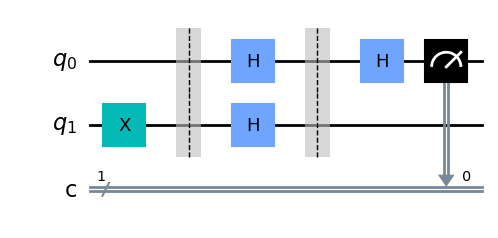

In [28]:

constant_circuit = deutsch_algorithm('constant')
constant_circuit.draw(output='mpl')

### *Balanced Function*

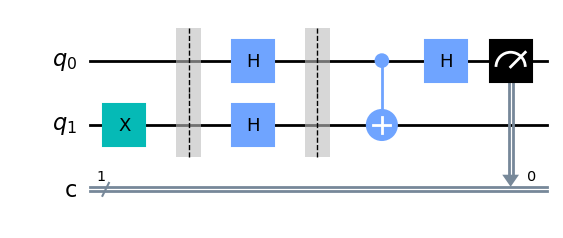

In [29]:

balanced_circuit = deutsch_algorithm('constant')
balanced_circuit.draw(output='mpl')

## Step 2: Superposition

In this step, I am applying a Hammard Gate to both qubits, which puts them in a state of superposition. This means that they are in a combination of all possible states.

In [30]:
# applying hammard gate to both qubits
circuit.h(0)
circuit.h(1)

circuit.barrier()

## Step 3: Oracle Application
 
In this step, I am applying the oracle function, $( U_f )$, to both qubits. The oracle is a black-box quantum operation that knows how to compute the function $f(x)$. If $f(x)$ is constant, it leaves the first qubit unchanged; if $f(x)$ is balanced, it flips the first qubit.


In [31]:
# creating the oracle
if function_type == "balanced":
    # apply cnot gate and flip the first qubit
     circuit.cx(0, 1)
elif function_type == "constant":
     # leave qubit unchanged if function is constant
     pass
    

NameError: name 'function_type' is not defined

## Step 4: Interference

In this step, I am applying a hammard gate to the first qubit. This causes interference and causes the quantum states to combine in ways that extract the property of the function.


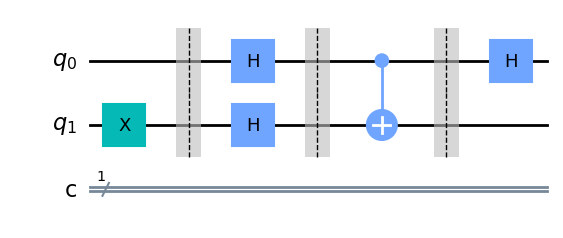

In [ ]:
# applying hammard gate
circuit.h(0)

circuit.draw(output='mpl') 

# Step 5: Measurement

Here I am measuring the first qubit. We can determine the type of function by looking at the state of the qubit.

- If the first qubit is observed in the state $|0\rangle$ , then the function $(f)$ is constant.

-  If it is in the state $|1\rangle$ , then the function $(f)$ is balanced.


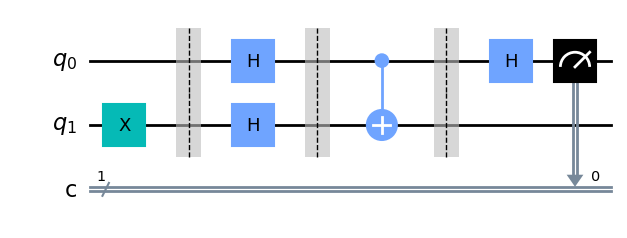

In [ ]:
# measuring the first qubit
circuit.measure(0,0)

circuit.draw(output='mpl') 